Extract Feature

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [351]:
d = pd.read_csv("/Users/fengchi-luen/Desktop/暑假-機器學習/ml2019spring-hw1/train.csv", header=0,encoding = 'unicode_escape')

In [352]:
# drop by column(index)
d.drop(d.columns[[0,1,2]], axis = 1, inplace = True)
d = d.replace('NR', 0)
pre_data = np.array(d, dtype = 'float') 

In [394]:
def extract(pre_data, train):
    
    #第一部分, 將資料做拼接
    data = np.zeros((18,1)) # 先建立一個data set
    temp = pre_data[0,:]
    for i in range(1,pre_data.shape[0]):
        if i%18 == 0:
            data = np.hstack((data, temp))
            temp = pre_data[i,:]
        else:
            temp = np.vstack((temp, pre_data[i,:]))
    data = np.hstack((data, temp))
    data = np.delete(data,0,axis = 1) 
    
    #第二部分, 將每9個小時的資料接起來作為訓練集(測試集)
    x_train = np.zeros((1,18*9))
    
    if train == True:
        y_train = []
        for i in range(data.shape[1] - 10):
            #處理y_train
            y_train.append(data[9,i + 9])
            
            #處理x_train
            temp = np.transpose(data[:,i:i+1])
            for j in range(i+1,i+9):
                temp = np.hstack((temp, np.transpose(data[:,j:j+1])))
            x_train = np.vstack((x_train,temp))
        x_train = np.delete(x_train,0,axis = 0) 
        y_train = np.array(y_train).reshape((5750,1)) #把y轉成array
        return x_train, y_train
    else:
        for i in range(0,data.shape[1],9):
            
            #處理x_train
            temp = np.transpose(data[:,i:i+1])
            for j in range(i+1,i+9):
                temp = np.hstack((temp, np.transpose(data[:,j:j+1])))
            x_train = np.vstack((x_train,temp))
        x_train = np.delete(x_train,0,axis = 0) 
        return x_train
        
    

In [390]:
def loss_visual(loss_list):
    # visualize loss 
    plt.style.use('classic')
    plt.plot(loss_list)
    plt.xlabel('iteration')
    plt.title('Loss')

In [395]:
x_train, y_train = extract(pre_data, True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


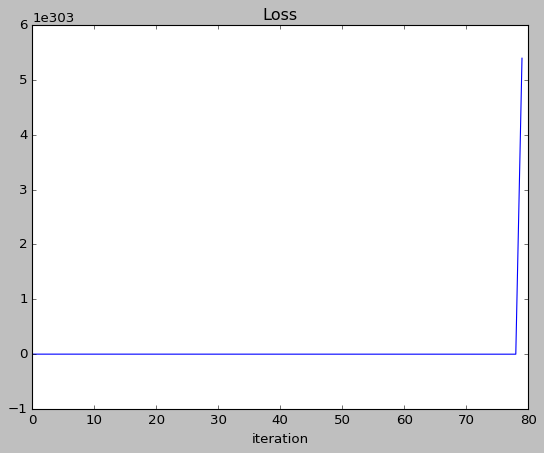

In [397]:
# Gradient descent最初版本
# 成效非常爛, 因為在gradient很容易把持不住數字就會狂飆
w = np.repeat(0.001, x_train.shape[1]).reshape(x_train.shape[1],1)
iteration = 300
lr = 0.000001 # learning rate
loss_list = []  #用來視覺化loss的變化
for i in range(iteration):
    y_predict = x_train.dot(w)
    loss = y_predict - y_train
    loss_list.append(loss.mean())
    gradient = 2 * np.dot(x_train.transpose(), loss)
    w -= lr * gradient
loss_visual(loss_list)

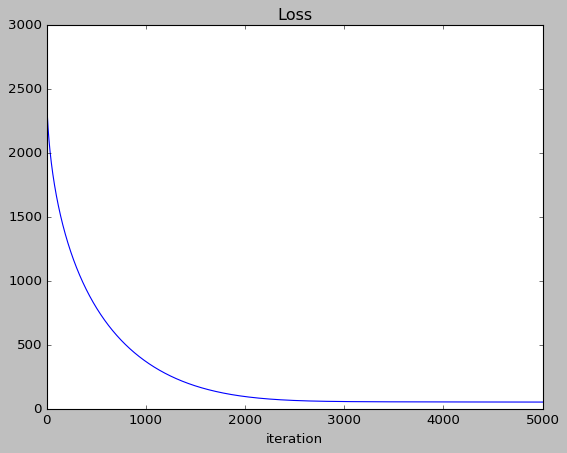

In [408]:
# Gradient descent Adagrad
#把之前的gradient納入考量的版本
#w = np.repeat(0.1, x_train.shape[1]).reshape(x_train.shape[1],1)
w = np.random.rand(x_train.shape[1],1)
iteration = 5000
lr = 0.01 # learning rate
prev_gra = np.zeros(x_train.shape[1]).reshape(x_train.shape[1],1)
loss_list = []  #用來視覺化loss的變化
for i in range(iteration):
    y_predict = x_train.dot(w)
    loss = y_predict - y_train
    loss_list.append(abs(loss).mean())
    gradient = 2 * np.dot(x_train.transpose(), loss)
    prev_gra += gradient ** 2
    ada = np.sqrt(prev_gra)
    w -= lr * gradient / ada
loss_visual(loss_list)

In [400]:
#testing
d_test = pd.read_csv("/Users/fengchi-luen/Desktop/暑假-機器學習/ml2019spring-hw1/test.csv", header= None,encoding = 'unicode_escape')
d_test.drop(d_test.columns[[0,1]], axis = 1, inplace = True)
d_test = d_test.replace('NR', 0)
pre_data_test = np.array(d_test, dtype = 'float')

In [420]:
x_test = extract(pre_data_test, False)
ans = pd.DataFrame(np.dot(x_train,w))

In [433]:
# filling
d_submission = pd.read_csv("/Users/fengchi-luen/Desktop/暑假-機器學習/ml2019spring-hw1/sampleSubmission.csv",encoding = 'unicode_escape')
d_submission = d_submission.drop(['value'], axis = 1)
d_submission['value'] = ans

In [438]:
d_submission.to_csv("/Users/fengchi-luen/Desktop/暑假-機器學習/ml2019spring-hw1/ans.csv", index = 0)

In [439]:
d_submission.head()

,id,value
0,id_0,55.787680
1,id_1,84.887269
2,id_2,37.900523
3,id_3,90.026105
4,id_4,73.132366
